# Homework 2

# Part 1: Expected Prediction Risk (EPR) 

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset. 

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math


def gaussian_mixture(n_samples, n_components, weights, means, covariances):
    labels = np.zeros(n_samples)
    samples = np.zeros((n_samples, 2))

    for i in range(n_samples):
        
        component = np.random.choice(n_components, p=weights)
        labels[i] = component
        
        sample = np.random.multivariate_normal(means[component], covariances[component])
        samples[i][0] = sample[0]
        samples[i][1] = sample[1]
    
    return samples, labels

### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


[]

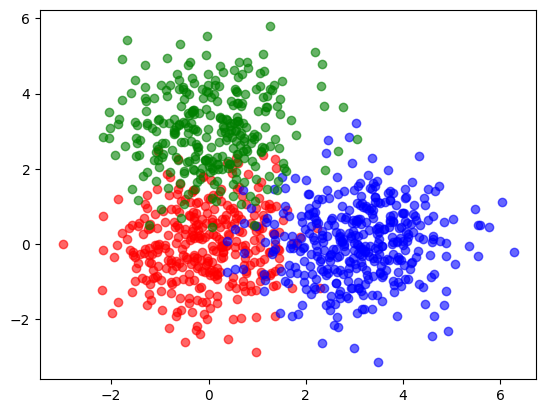

In [67]:
n = 1000
k = 3
weights = [0.3,0.4,0.3]
means = [[0,0],[3,0],[0,3]]
covariances = [np.eye(2), np.eye(2), np.eye(2)]

samples, labels = gaussian_mixture(n, k, weights, means, covariances)

colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(samples[labels == i, 0], samples[labels == i, 1], 
                label=f"Component {i+1}", color=colors[i], alpha=0.6)

plt.plot()


We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model. 

### **Q6** Compute the posterior probabilities for this model.

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

### **Q7B** Plot the optimal decision boundary for this model using the above calcultations. 


[]

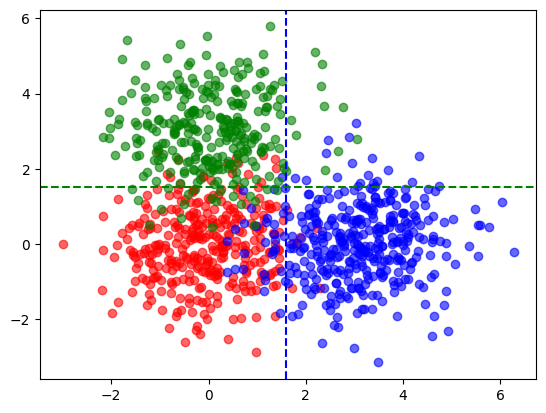

In [68]:
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(samples[labels == i, 0], samples[labels == i, 1], 
                label=f"Component {i+1}", color=colors[i], alpha=0.6)

c1 = 1.5 + (1/3) * math.log(4/3)
plt.axvline(x=c1, color="blue", linestyle="--", label=f"x1 = {c1}")

c2 = 1.5
plt.axhline(y=c2, color="green", linestyle="--", label=f"x1 = {c2}")

plt.plot()

### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


In [69]:
def predict(coord_pair, x_thresh, y_thresh):
    x_val = coord_pair[0]
    y_val = coord_pair[1]

    if x_val > x_thresh:
        return 1
    elif y_val > y_thresh:
        return 2
    else:
        return 0

def compute_loss(predicted_labels, true_labels):
    correct = 0
    total = len(true_labels)
    for i in range(total):
        if (predicted_labels[i] == true_labels[i]):
            correct += 1
    return float(correct) / float(total)

In [ ]:
predicted_labels = [predict(i, c1, c2) for i in samples]

print(compute_loss(predicted_labels, labels))

0.912


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$


### **Q9** What is the decision boundary between class 1 and class 2 in this case?


### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them. 

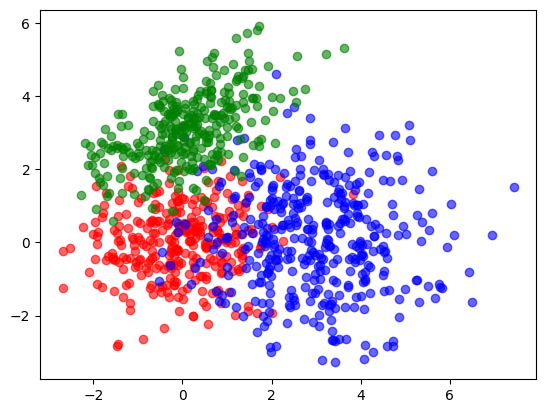

In [71]:
n_2 = 1000
k_2 = 3
weights_2 = [0.3,0.4,0.3]
means_2 = [[0,0],[3,0],[0,3]]
covariances_2 = [[[1,0],[0,1]], [[2,0],[0,2]], [[1,0.5],[0.5,1]]]

samples_2, labels_2 = gaussian_mixture(n_2, k_2, weights_2, means_2, covariances_2)

for i in range(k):
    plt.scatter(samples_2[labels_2 == i, 0], samples_2[labels_2 == i, 1], 
                label=f"Component {i+1}", color=colors[i], alpha=0.6)

### **Q12** Compute the error of the Bayes classifier on this dataset.